### Python使用Gaussian Mixture Models
### 使用sklearn包提供的GMM类

In [1]:
# encoding:utf-8

import numpy as np
import pylab as pl
from sklearn import mixture


%matplotlib inline  

In [2]:
def data_loader():
    samples = list()
    centers = [(-1.0, 0.0), (1.0, 0.0),
               (0.0, -1.0), (0.0, 1.0)]
    for center in centers:
        samples.extend(zip(np.random.normal(center[0], 0.25, 100),
                           np.random.normal(center[1], 0.25, 100)))
    return samples

cluster_num = 4
instances = data_loader()

In [3]:
gmm = mixture.GMM(cluster_num)
gmm.fit(instances) # 估计模型参数

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_densit

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)

In [4]:
print gmm.weights_
print gmm.means_
print gmm.covars_

[ 0.250468    0.25083369  0.25003023  0.24866808]
[[-0.98778755  0.02287501]
 [-0.00712007 -0.97240669]
 [ 1.00759288  0.01766849]
 [-0.00416808  0.99566141]]
[[ 0.07864255  0.07990253]
 [ 0.06400342  0.06763581]
 [ 0.04766352  0.06734359]
 [ 0.06275629  0.05652707]]


In [5]:
# 对某个样本进行聚类类别指派
def assign(inst, _gmm):
    return _gmm.predict(inst)


In [6]:
basic_colors = ['r', 'g', 'b', 'y']
basic_markers = ['+', 'o', '*', '^']
def plot_points(points, assigns=None, colors=None, markers=None):
    if assigns is not None:
        colors = [basic_colors[i] for i in assigns]
        markers = [basic_markers[i] for i in assigns]
    if colors is None or markers is None:
        colors = ['r' for _ in points]
        markers = ['+' for _ in points]
    for p, c, m in zip(points, colors, markers):
        pl.scatter(p[0], p[1], c=c, marker=m)
    pl.title('dataset with %d clusters and known outcomes.' % cluster_num)
    pl.show()

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


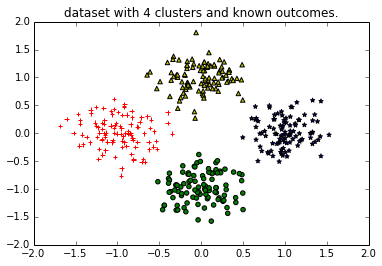

In [7]:
labels = gmm.predict(instances)
plot_points(instances, labels)